In [2]:
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np
import odf
import math
import pdfkit
from scipy.stats import linregress
from scipy.integrate import simps
import scipy.constants as const
from itertools import chain
from statistics import mean
from uncertainties import ufloat, ufloat_fromstr
from uncertainties.umath import *
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit, minimize_scalar
from lmfit.models import LorentzianModel
from IPython.display import display, Latex
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Diffraction

In [49]:
V = np.array([7, 6.5, 6, 5.5, 5, 4.5, 4]) * (10**3) #V
r1 = np.array([1.9, 1.9 + 5/10, 2 + 7/10, 2.1 + 6/10, 2.3, 2.3 + 5/10, 2.9 + 8/10]) * (10**(-2))  / 2 #m
r2 = [3.2 + 9/10, 3.3 +2/10, 3.5, 3.6 + 6/10, 3.7 + 4/10, 4.2, 4.2 + 7/10] #cm
R = 65 * (10**(-3)) #m

In [50]:
wavelength = []
for i in range(len(V)):
    wavelength.append(const.h / (np.sqrt(2 * const.m_e * const.e * V[i])))

3.8382108340278315e-20


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

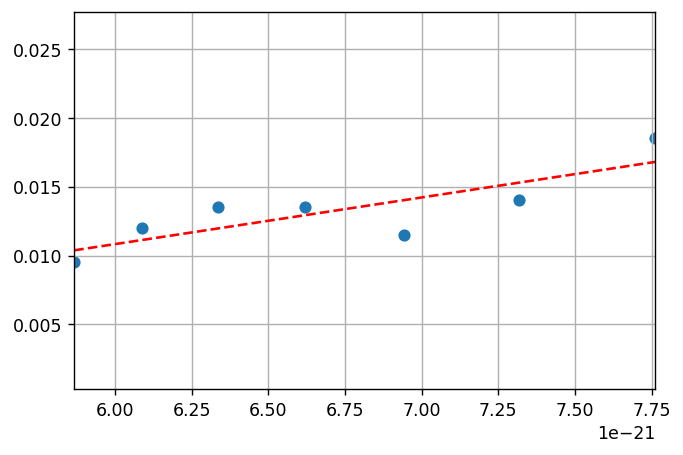

In [51]:
X = np.array(wavelength).reshape(-1, 1)
Y = np.array(r1).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
intercept = reg.intercept_
coef = reg.coef_
reg_value = reg.score(X, Y)
d = (2 * R)/coef[0, 0]
print(d)
plt.figure(dpi=125)
plt.xlim(min(X), max(X))
plt.scatter(X, Y)
plt.plot(X, coef[0, 0] * X + intercept[0], 'r--')
plt.grid()
display(Latex("$f(x) = {:.2f}x {:.2f}$".format(coef[0, 0], intercept[0])))
display(Latex("$R^2 = {:.2f}$".format(reg_value)))
plt.show()

### Compton Scattering

In [40]:
def read_data(filename):
    f = codecs.open('{}'.format(filename)).read().replace(',', '.')
    i = open('new.txt', "w")
    i.write(f)
    i.close()
    f = codecs.open('new.txt'.format(filename)).read().replace('\t', ',')
    i = open('new1.txt', "w")
    i.write(f)
    i.close()
    data = ''
    if filename != 4:
        data = pd.read_csv('new1.txt', skiprows=3, usecols=[0, 1], names=['angle', 'count'])
    else:
        data = pd.read_csv('new1.txt1', skiprows=3, usecols=[0, 2], names=['n', 'R'])
    return data
data_1 = read_data('1')
data_2 = read_data('2')
data_3 = read_data('3')
data_4 = read_data('4')

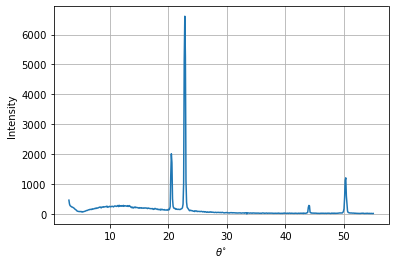

In [41]:
plt.plot(np.array(data_1['angle']), np.array(data_1['count']))
plt.xlabel(r'$\theta^{\circ}$')
plt.ylabel('Intensity')
plt.grid()
plt.show()



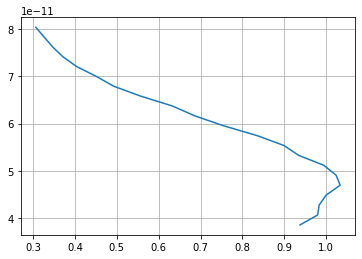

   angle  count
0      1    7.7
1      2  278.0
2      3  112.7
3      4   92.0


In [56]:
max_angle = [20.5, 22.8, 44, 50.3]
d = 201.4 * (10**(-12))
n = [1, 2]
T1 = np.array(data_3['count'])/np.array(data_2['count'])
wavelength = (2 * d * (np.sin([np.deg2rad(i) for i in np.array(data_2['angle'])])))/n[0]
plt.plot(np.array(T1), np.array(wavelength))
plt.grid()
plt.show()
print(data_4)